#  Определение тарифа для телеком компании

### Описание проекта:

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

### Цель:

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов:
- Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
- Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

### Описание данных:

Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана
Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок
Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение
Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя
Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


### Задачи исследования
1. [Изучение общей информации](#start)
2. [Предобработка данных](#preprocessing)
    * [Обработка пропущенных значений и дубликатов](#a)
    * [Приведение данных к целочистленному типу](#b)
    * [Обработка нулевых значений](#c)
    * [Построение сгруппированных таблиц по каждому пользователю](#d)
3. [Анализ и описание данных](#e)    
    - [Описать поведение клиентов оператора, исходя из выборки](#k)
    - [Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?](#k)
    - [Cреднее количество, дисперсию и стандартное отклонение](#o)
    - [Построить гистограммы. Описать распределение. Сделать на основании этого вывод](#v)
4. [Проверка гипотез и пояснения](#f)
    - [средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются](#f)
    - [средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#f)
5. [Вывод](#g)

## Изучение общей информации:
<a id="start"></a>

In [1]:
#Подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st
import numpy as np

In [2]:
#Получение данных
calls = pd.read_csv('/datasets/calls.csv', parse_dates = ['call_date'])
internet = pd.read_csv('/datasets/internet.csv', parse_dates = ['session_date'])
messages = pd.read_csv('/datasets/messages.csv', parse_dates = ['message_date'])
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

## Предобработка данных:
<a id="preprocessing"></a>

### Обработка пропущенных значений и дубликатов
<a id="a"></a>

In [4]:
#Посмотрим в цикле все данные, а также наличие значений NaN и дубликатов
for col in calls, internet, messages, tariffs, users:
    #display('Количество NaN в каждой группе:', col.isna().sum().sort_values())
    #display('Общая информация:', col.describe())
    #display('Количество дубликатов:', calls.duplicated().sum())
    display(col)
    #col.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


### Приведение данных к целочистленному типу
<a id="b"></a>

In [4]:
#Переведем столбец 'user_id'  и 'id' во всех данных к типу int 
for col in calls, internet, users:
    col['user_id'] = col['user_id'].astype('int')
for col in calls, messages:    
    col['id'] = col['id'].astype('int')

### Обработка нулевых значений
<a id="c"></a>

In [5]:
#Округлили минуты вверх, так как было сказанно, что Мегалайн округляет все значения вверх
calls['duration'] = calls['duration'].apply(np.ceil) 
#звонки, которые длятся 0.0 минут их нужно удалить, так как за них не взимается плата и для анализа и расчета они не понадобятся
calls = calls[calls['duration'] != 0]
#сбои сети скорее всего дали значение 0 в столбце, за это тоже не взимается плата и для анализа и расчета они не понадобятся
internet = internet[internet['mb_used'] != 0]

### Построение сгруппированных таблиц по каждому пользователю
<a id="d"></a>

In [6]:
#Создание столбца месяц
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month
#Таблица показывающая, количество сделанных звонков и израсходованных минут разговора по месяцам
call_grouping = calls.groupby(['month', 'user_id']).agg({'duration' : 'sum', 'id' : 'count'})
display(call_grouping)

#Таблица показывающая, количество отправленных сообщений по месяцам
messages_grouping = messages.groupby(['month', 'user_id']).agg({'id' : 'count'}) 
display(messages_grouping)

#Таблица показывающая, объем израсходованного интернет-трафика по месяцам
internet_grouping = internet.groupby(['month', 'user_id']).agg({'mb_used' : 'sum'})
display(internet_grouping)

duration   id
month user_id               
1     1005         95.0   11
      1032        380.0   44
      1045          9.0    1
      1055        551.0   47
      1071        194.0   18
...                 ...  ...
12    1494        418.0   54
      1495       1031.0  120
      1496        518.0   65
      1497        545.0   58
      1499        492.0   56

[3168 rows x 2 columns]

id
month user_id    
1     1005      7
      1032     38
      1045      5
      1055     30
      1071     16
...            ..
12    1493     78
      1495     84
      1496     51
      1497     17
      1499     66

[2717 rows x 1 columns]

mb_used
month user_id          
1     1005      2727.97
      1032     24127.69
      1045      2346.71
      1055     17090.88
      1071     15604.34
...                 ...
12    1494     17621.21
      1495     23426.76
      1496     20736.15
      1497     19918.60
      1499     13055.58

[3201 rows x 1 columns]

In [7]:
#Помесячная выручкa с каждого пользователя
#сгруппируем в одну таблицу нужные нам значения
data = call_grouping.merge(messages_grouping,  how = 'outer', on = ['user_id', 'month'], suffixes = ('_calls', '_messages')).reset_index().merge(internet_grouping,  how = 'outer', on = ['user_id', 'month']).reset_index().merge(users[['user_id', 'tariff', 'city']], how = 'left', on = 'user_id').reset_index()
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
data = data.merge(tariffs, on='tariff', how='left')

#Итоговая таблица
#display(data)

#Посмотрим значения NaN
display(data.isna().sum())

# Поставим нули людям, скорее всего они не тратят интернет, не пишут смс или не разговаривают
data['duration'] = data['duration'].fillna(0)
data['id_calls'] = data['id_calls'].fillna(0)
data['id_messages'] = data['id_messages'].fillna(0)
data['mb_used'] = data['mb_used'].fillna(0)

#Дубликатов нет
display(data.duplicated().sum())

def the_tariff(row):
    sms = (row['id_messages'] - row['messages_included']) * row['rub_per_message']
    mins = (row['duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.ceil((row['mb_used'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total
data['above_the_tariff'] = data.apply(lambda x: the_tariff(x), axis=1)
data['total_paid'] = data['rub_monthly_fee'] + data['above_the_tariff']
#Итоговая таблица
display(data)

#Приведение столбцов ['total_paid'] и ['above_the_tariff'] к целочисленному виду
data['total_paid'] = data['total_paid'].astype('int')
data['above_the_tariff'] = data['above_the_tariff'].astype('int')


level_0                    0
index                      0
user_id                    0
month                      0
duration                  46
id_calls                  46
id_messages              497
mb_used                   13
tariff                     0
city                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

0

,level_0,index,user_id,month,duration,id_calls,id_messages,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
0,0,0,1005,1,95.0,11.0,7.0,2727.97,smart,Набережные Челны,50,15360,500,550,200,3,3,0.0,550.0
1,1,1,1032,1,380.0,44.0,38.0,24127.69,smart,Ульяновск,50,15360,500,550,200,3,3,1713.0,2263.0
2,2,2,1045,1,9.0,1.0,5.0,2346.71,smart,Улан-Удэ,50,15360,500,550,200,3,3,0.0,550.0
3,3,3,1055,1,551.0,47.0,30.0,17090.88,smart,Казань,50,15360,500,550,200,3,3,492.0,1042.0
4,4,4,1071,1,194.0,18.0,16.0,15604.34,smart,Омск,50,15360,500,550,200,3,3,48.0,598.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,3209,3209,1328,12,0.0,0.0,7.0,39419.73,ultra,Мурманск,1000,30720,3000,1950,150,1,1,1275.0,3225.0
3210,3210,3210,1473,12,0.0,0.0,20.0,18418.26,ultra,Красноярск,1000,30720,3000,1950,150,1,1,0.0,1950.0
3211,3211,3211,1489,12,0.0,0.0,35.0,17322.51,smart,Санкт-Петербург,50,15360,500,550,200,3,3,384.0,934.0
3212,3212,3212,1240,2,0.0,0.0,0.0,959.51,ultra,Воронеж,1000,30720,3000,1950,150,1,1,0.0,1950.0


Просмотрев все таблицы и изучив их можно сказать:
- Дубликаты отсутствуют, а значения NaN существует только в одном столбце ['churn_date'], который в дальейшем нам не пригодится, поэтому оставим его без изменений и не будем эти данные вносить в общую таблицу, которая построится в дальнейшем. 
- Для дальнейшей работы были приведены значения столбцов ['user_id']  и ['id'] к типу int. А в столбцах ['call_date'], ['session_date'], ['message_date'] необходимо перевести все строки в даты, это было сделано при получении данных с помощью parse_dates = ['...'].
- В значения столбца [duration] округлены минуты вверх, так как было сказанно, что Мегалайн округляет все значения вверх. Звонки, которые длятся 0.0 минут их нужно удалить, так как за них не взимается плата и для анализа и расчета они не понадобятся. В теории звонки либо были отклонены, либо были сброшены, поэтому мы видим нулевое значение.

Далее, чтобы посчитать для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам,
количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам были построены новые столбцы в каждой таблице [month]. Были сгруппированы данные для отражения нужной нам картины. И после данные бали помещены в одну таблицу, состоящую из данных которые пригодятся дальше.

Помесячную выручка с каждого пользователя была посчитана как: из суммарного количества звонков сообщений и интернет-трафика вычитался бесплатный лимит, а остаток умножался на значение из тарифного плана. И в конце прибавлялась абонентская плата, соответствующую тарифному плану. Также общая сумма за месяц трафика была также округлена в бо́льшую сторону.

В итоговой таблице появились значения NaN, поэтому поставим нули людям, которые скорее всего они не тратят интернет, не пишут сообщения или не разговаривают. Дубликатов нет.

## Анализ и описание данных
<a id="e"></a>

smart    2229
ultra     985
Name: tariff, dtype: int64

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 7000)

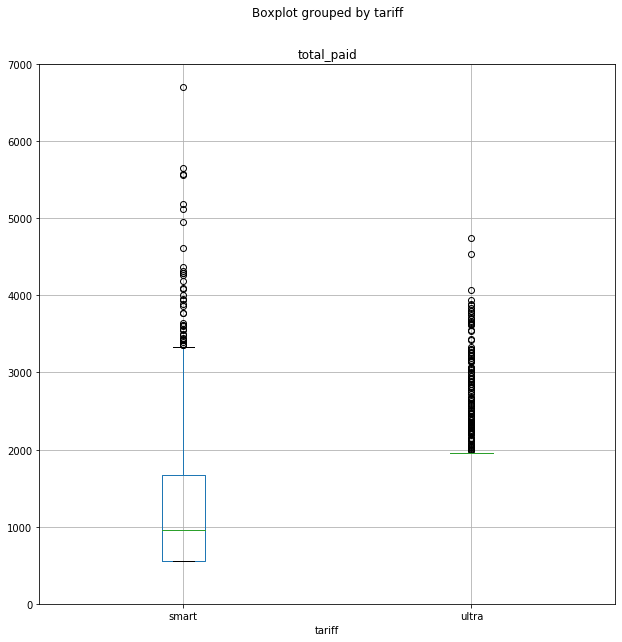

In [8]:
data[['above_the_tariff', 'total_paid']].describe()
display(data['tariff'].value_counts())
data.boxplot('total_paid', by = 'tariff', figsize = (10,10)).set_ylim(0,7000)

В тарифе [smart] видны выбросы после значения 3100. В среднем с каждого пользователя компания по тарифу Smart получает около 900. В [ultra] достаточно непонятно, какие именно выбросы, поэтому стоит обратиться к гистограмме. В тарифе [ultra] видно, что в среднем с каждого пользователя компания получает около 2000, выбросы начинаются примерно после 3000.
<a id="k"></a>

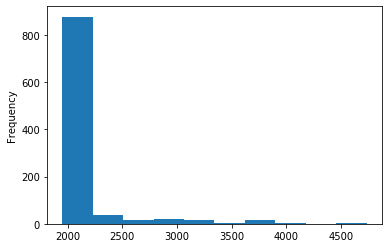

In [9]:
data[data['tariff'] == 'ultra']['total_paid'].plot(kind = 'hist', bins=10)

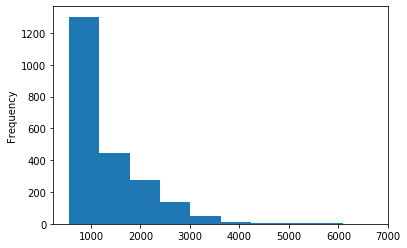

In [10]:
data[data['tariff'] == 'smart']['total_paid'].plot(kind = 'hist', bins=10)

In [11]:
data.groupby('tariff').agg({'total_paid':['median','mean','var','std']}).style.format("{:.2f}")

Здесь прекрасно видно, что люди покупая тариф "Smart", выходят за тарифный план и платят около тысячи рублей им явно не хватает этого пакета. В тарифе "Ultra" а люди почти не вылезают за абонентскую плату
<a id="o"></a>

In [12]:
data.groupby('tariff').agg({'duration':['median','mean','var','std']}).style.format("{:.2f}")

Text(0.5, 1.0, 'Smart — Звонки в минутах в месяц')

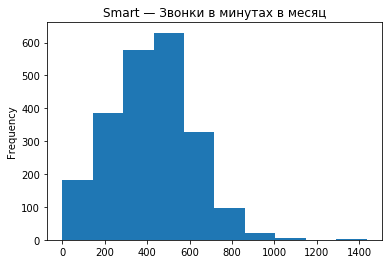

In [13]:
data[data['tariff'] == 'smart']['duration'].plot(kind='hist', bins=10)
plt.title('Smart — Звонки в минутах в месяц')

Text(0.5, 1.0, 'Ultra — Звонки в минутах в месяц')

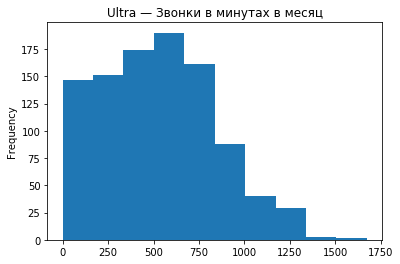

In [14]:
data[data['tariff'] == 'ultra']['duration'].plot(kind='hist', bins=10)
plt.title('Ultra — Звонки в минутах в месяц')

В тарифе "Smart" люди в месяц говорят около 450 минут, на "Ultra" 550 минут в месяц. То есть на первом тарифе люди подходят к краю своего тарифа, а на втором у них остается большой запас. Среднее и медиана лежат рядом и там и там — люди не выходят за область пакета тарифа

In [15]:
data.groupby('tariff').agg({'mb_used':['median','mean','var','std']}).style.format("{:.2f}")

Text(0.5, 1.0, 'Smart — Интернет в МБ в месяц')

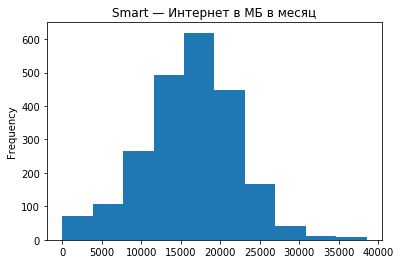

In [16]:
data[data['tariff'] == 'smart']['mb_used'].plot(kind='hist', bins=10)
plt.title('Smart — Интернет в МБ в месяц')

Text(0.5, 1.0, 'Ultra — Интернет в МБ в месяц')

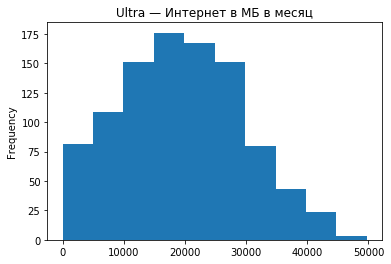

In [17]:
data[data['tariff'] == 'ultra']['mb_used'].plot(kind='hist', bins=10)
plt.title('Ultra — Интернет в МБ в месяц')

Среднее и медиана лежат совсем рядом и видно, что на тарифе "Smart" люди выходят за пределы тарифа, в тарифе "Ultra" запас намного больше и пользователи не выходят за рамки пакета

In [18]:
data.groupby('tariff').agg({'id_messages':['median','mean','var','std']}).style.format("{:.2f}")

Text(0.5, 1.0, 'Smart — сообщений в месяц')

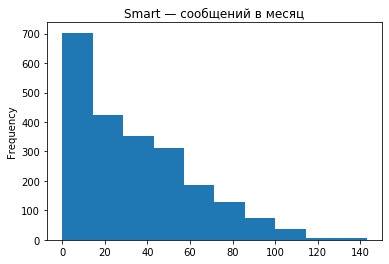

In [19]:
data[data['tariff'] == 'smart']['id_messages'].plot(kind='hist', bins=10)
plt.title('Smart — сообщений в месяц')


Text(0.5, 1.0, 'Ultra — сообщений в месяц')

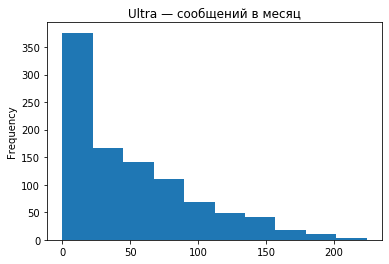

In [20]:
data[data['tariff'] == 'ultra']['id_messages'].plot(kind='hist', bins=10)
plt.title('Ultra — сообщений в месяц')

Поведение пользователей выглядит почти одинаковым. в обоих тарифах пользователи не выходят за пределы пакета, сообщения пользователи почти не используют.

Общий вывод:

Для пользователя намного выгоднее тариф "Smart". Поэтому коммерческому департаменту стоит сделать упор рекламы именно на этот тариф. У тарифа "Smart" аудитория намного больше и он более привлекательнее для пользователей своей низкой стандартной ежемесячной платой, также люди очень часто готовы платить сверхлимита, что очень выгодно для компании
Пользователей тарифа "Ultra" меньше, они не используют весь трафик, не выговаривают столько минут и не пишут почти сообщения, они получаются переплачивают. Однако такой тариф совсем убирать нельзя, так как некоторым людям он действительно нужен, например звонить и разговаривать очень много по работе и т.д. Как предложение можно сделать данный тариф семейным, т.е с возможностью подключить еще одного человека, данных тариф одновременно для двоих был бы идеален.  
<a id="v"></a>

## Проверка гипотез и пояснения
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов
<a id="f"></a>

In [21]:
proceeds = data.pivot_table(index='tariff', values='total_paid', aggfunc=['sum', 'mean'])
display(proceeds)

ultra = data[data['tariff'] == 'ultra']
smart = data[data['tariff'] == 'smart']

ultra = ultra.query('total_paid < 3500')
ultra = ultra['total_paid']

smart = smart.query('total_paid < 3100')
smart = smart['total_paid']

alpha = 0.05# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(ultra, smart)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
    
data['city'].unique()

data['region'] = np.where(data['city'] == 'Москва', 'Москва', 'Провинция')

moscow = data[data['region'] == 'Москва']
province = data[data['region'] == 'Провинция']

moscow = moscow.query('region == "Москва"')
moscow = moscow['total_paid']

province = province.query('region == "Провинция"')
province = province['total_paid']

results = st.ttest_ind(moscow, province)
# equal_var = False

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")    

,sum,mean
,total_paid,total_paid
tariff,,
smart,2743322,1230.741140
ultra,2029037,2059.936041


p-значение: 3.398200192032115e-280
Отвергаем нулевую гипотезу
p-значение: 0.4701816724073484
Не получилось отвергнуть нулевую гипотезу


В самом начале видна достаточно большая разница между средними платежами за месяц по тарифам. Видно, что пользователям тарифа "Smart", выгоднее подобрать для себя другой тариф, это позволит сэкономить им. В тарифе "Ultra" люди почти не переплачивают.
Гипотеза такова: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Так ли это?  
Перед нами две генеральные совокупности и нужно сопоставить их средние. Так как, чтобы это понять недостаточно просто сравнить числа за определённый период времени, необходимо применить метод scipy.stats.ttest_ind (array1, array2, equal_var). Нулевой гипотезой будет гипотеза о том, что средние наших выборок равны. Альтернативной гипотезой будет "Средняя выручка пользователей тарифов «Ultra» и «Smart» различается". Используется t-критерий Стьюдента, так как сравниваемые выборки независимы между собой. Исходя из значения р различие средних двух датасетов значительна. А значит сформулированная гипотеза о том, что средние наших выборок отличаются, не отвергается. Для второго случая нулевой гипотезой будет гипотеза о том, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. Альтернативной гипотезой будет, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов Гипотеза о различии средних отвергается

# Вывод
<a id="g"></a>
Тариф "Smart" имеет большую аудиторию и он более привлекательный для пользователей своей низкой стандартной ежемесячной платой, но люди очень часто платят сверхлимита, что очень выгодно для компании. Но именно это может оттолкнуть пользователей.  Пользователей тарифа "Ultra" меньше, они не используют весь трафик, не выговаривают столько минут и не пишут почти сообщения, они получаются переплачивают. Сообщения почти никто не использует на обоих тарифах. Но если в Смарте люди близки к своим лимитам, то на Ультре остаются большие неизрасходованные "запасы" — возможно, имеет смысл подумать, как использовать эту, по сути, упущенную выгоду. Поэтому стоит подумать над оптимизацией тарифов


- Деньги компания получает одинаково и из регионов, и из Москвы, нет больших различий 
- Тарифы приносят разные деньги, значимые различия есть

